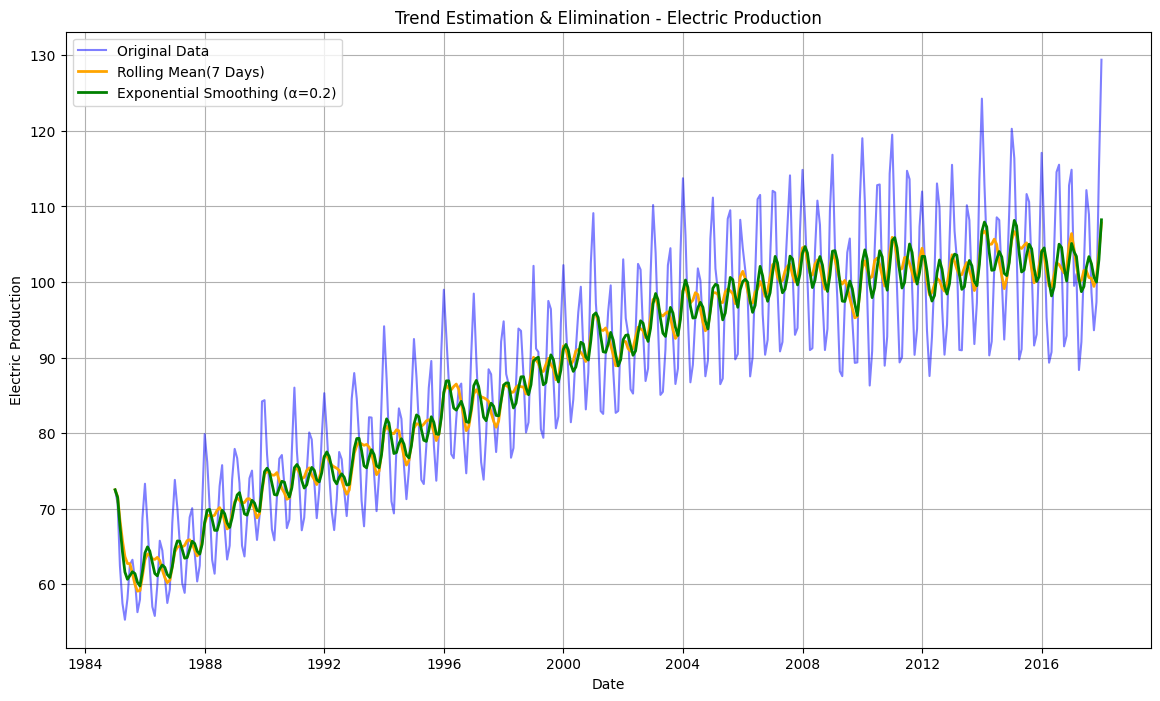

<Figure size 1400x1000 with 0 Axes>

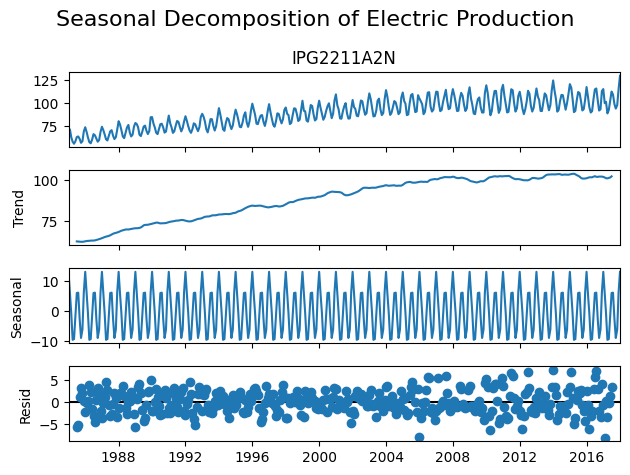

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load and preprocess data
electric_data = pd.read_csv('/content/Electric_Production.csv')
electric_data['DATE'] = pd.to_datetime(electric_data['DATE'])
electric_data.set_index('DATE', inplace=True)

# Step 2: Perform Trend Estimation
# 7-Day Rolling Mean
electric_data_rolling = electric_data.rolling(window=7, min_periods=1).mean()

# Exponential Smoothing with alpha=0.2
electric_data_ewm = electric_data.ewm(alpha=0.2).mean()

# Step 3: Visualize Trend Estimation
plt.figure(figsize=(14, 8))
plt.plot(electric_data.index, electric_data['IPG2211A2N'], label='Original Data', color='blue', alpha=0.5)
plt.plot(electric_data_rolling.index, electric_data_rolling['IPG2211A2N'], label='Rolling Mean(7 Days)', color='orange', linewidth=2)
plt.plot(electric_data_ewm.index, electric_data_ewm['IPG2211A2N'], label='Exponential Smoothing (α=0.2)', color='green', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.title('Trend Estimation & Elimination - Electric Production')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Step 4: Perform Seasonal Decomposition using Additive Model
decomposition = seasonal_decompose(electric_data['IPG2211A2N'], model='additive', period=12)

# Step 5: Visualize Decomposed Components
plt.figure(figsize=(14, 10))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Electric Production', fontsize=16)
plt.tight_layout()
plt.show()


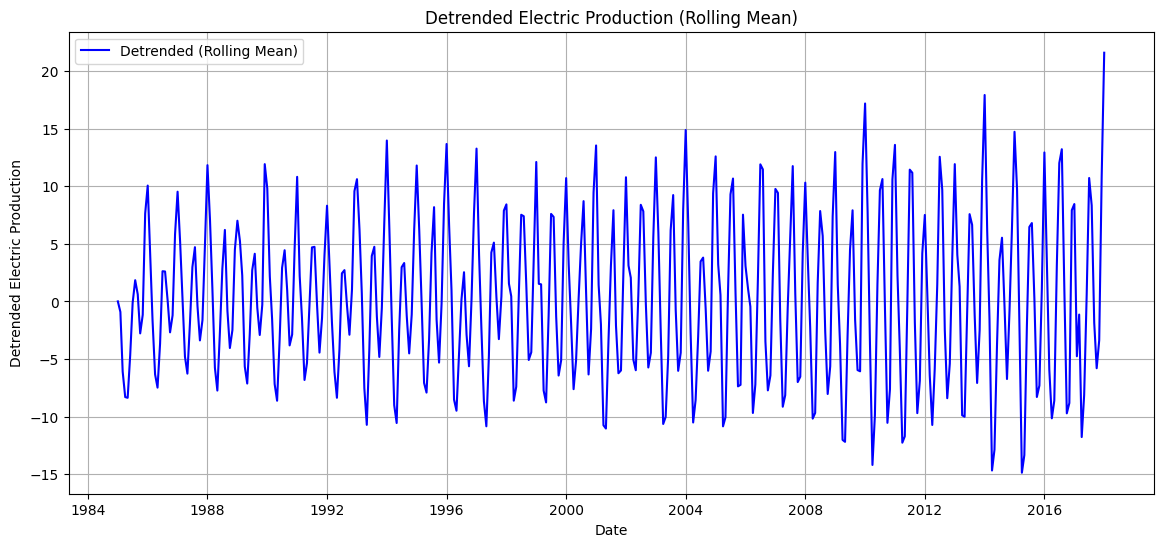

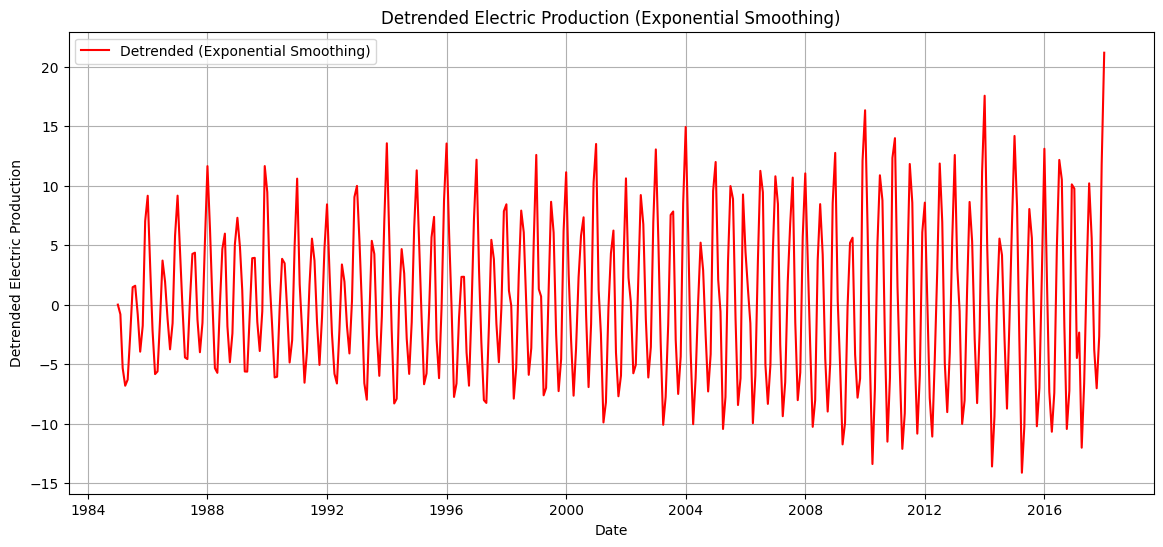

In [ ]:
# prompt: ok give code to plot the detrended rolling mean and detrended exponential smoothening

# Step 6: Detrend the data by subtracting the rolling mean
electric_data_detrended_rolling = electric_data['IPG2211A2N'] - electric_data_rolling['IPG2211A2N']

# Step 7: Detrend the data by subtracting the exponential smoothing
electric_data_detrended_ewm = electric_data['IPG2211A2N'] - electric_data_ewm['IPG2211A2N']

# Step 8: Plot the detrended data with rolling mean
plt.figure(figsize=(14, 6))
plt.plot(electric_data_detrended_rolling.index, electric_data_detrended_rolling, label='Detrended (Rolling Mean)', color='blue')
plt.xlabel('Date')
plt.ylabel('Detrended Electric Production')
plt.title('Detrended Electric Production (Rolling Mean)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Step 9: Plot the detrended data with exponential smoothing
plt.figure(figsize=(14, 6))
plt.plot(electric_data_detrended_ewm.index, electric_data_detrended_ewm, label='Detrended (Exponential Smoothing)', color='red')
plt.xlabel('Date')
plt.ylabel('Detrended Electric Production')
plt.title('Detrended Electric Production (Exponential Smoothing)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Processing IPG2211A2N...


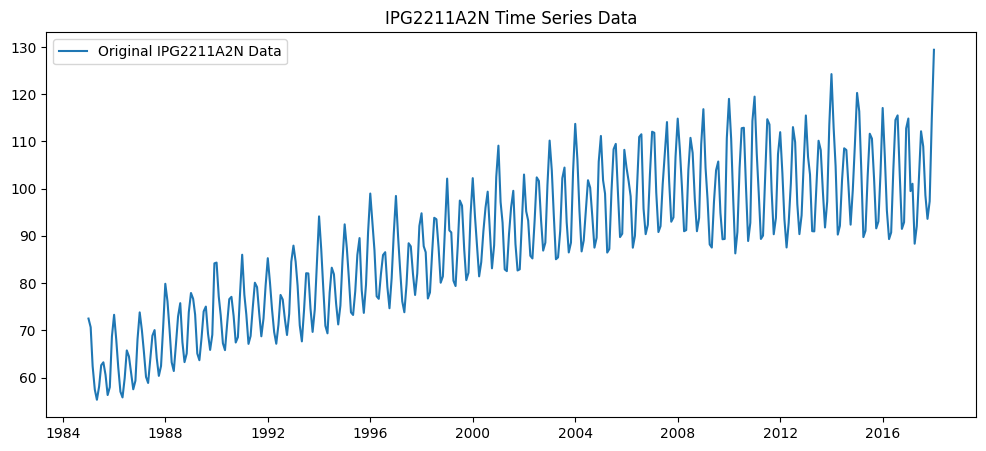

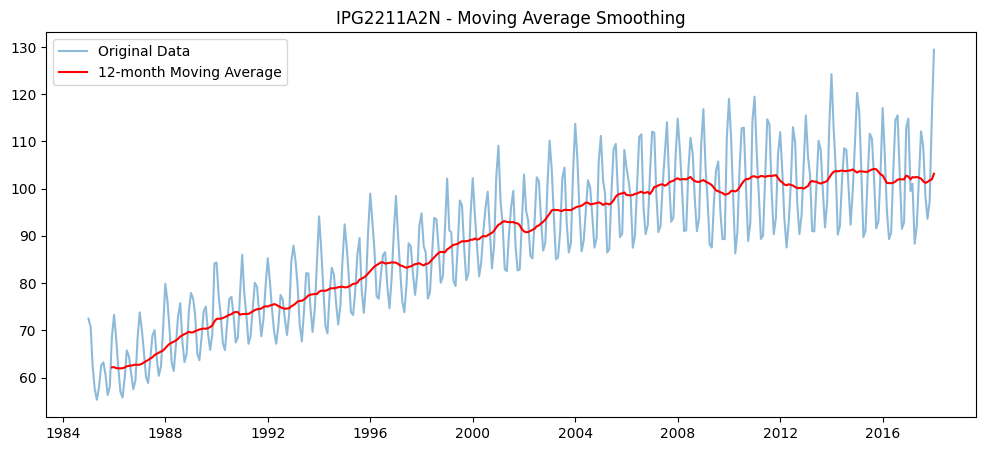

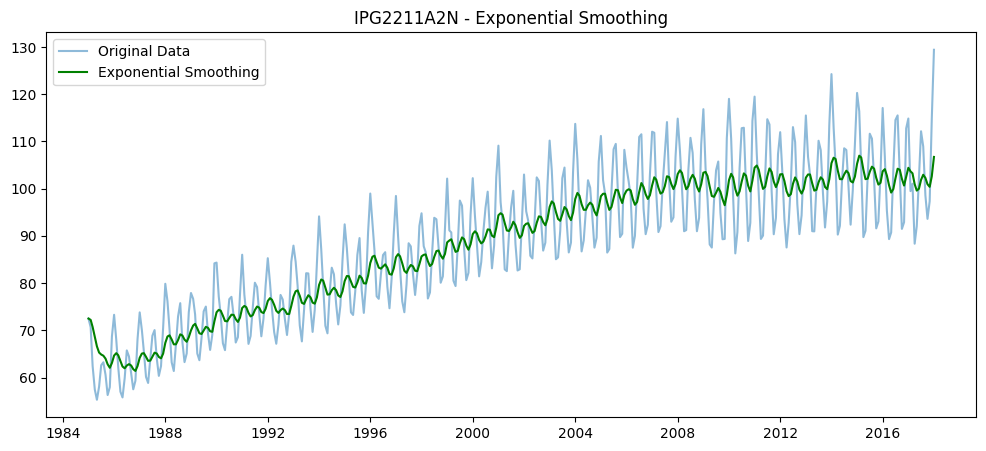

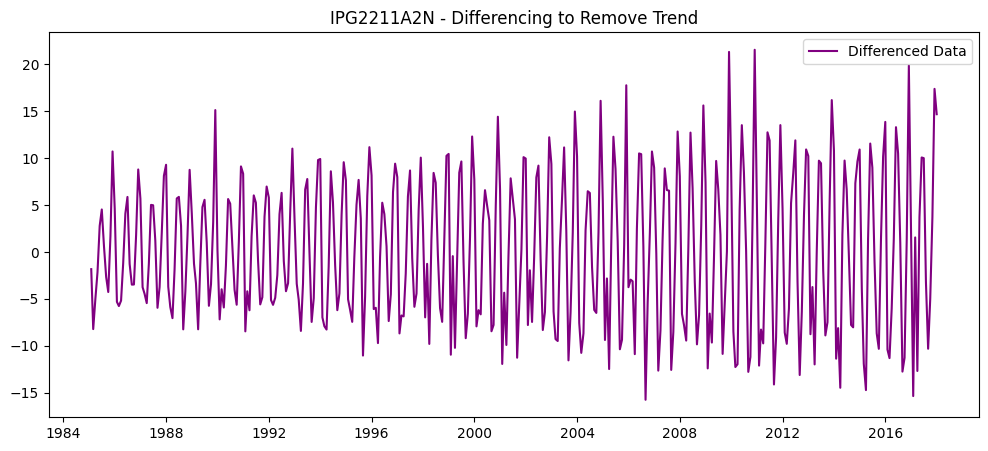

<Figure size 1000x800 with 0 Axes>

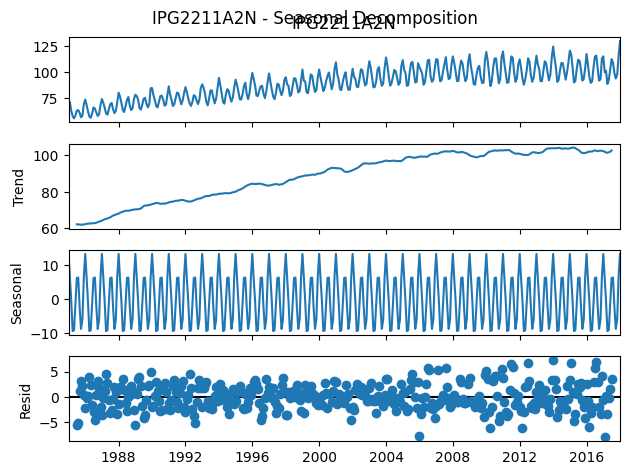

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = "/content/Electric_Production.csv"
df = pd.read_csv(file_path)

# Convert 'DATE' to datetime and set as index
df["DATE"] = pd.to_datetime(df["DATE"])
df.set_index("DATE", inplace=True)

# Define function to process the time series data
def analyze_trend(column):
    print(f"Processing {column}...")

    plt.figure(figsize=(12, 5))
    plt.plot(df[column], label=f"Original {column} Data")
    plt.legend()
    plt.title(f"{column} Time Series Data")
    plt.show()

    # Moving Average Smoothing (Rolling Mean)
    window_size = 12
    df[f"{column}_Rolling_Mean"] = df[column].rolling(window=window_size).mean()
    plt.figure(figsize=(12, 5))
    plt.plot(df[column], label="Original Data", alpha=0.5)
    plt.plot(df[f"{column}_Rolling_Mean"], label=f"{window_size}-month Moving Average", color="red")
    plt.legend()
    plt.title(f"{column} - Moving Average Smoothing")
    plt.show()

    # Exponential Smoothing
    df[f"{column}_Exp_Smooth"] = df[column].ewm(span=12, adjust=False).mean()
    plt.figure(figsize=(12, 5))
    plt.plot(df[column], label="Original Data", alpha=0.5)
    plt.plot(df[f"{column}_Exp_Smooth"], label="Exponential Smoothing", color="green")
    plt.legend()
    plt.title(f"{column} - Exponential Smoothing")
    plt.show()

    # Differencing to remove trend
    df[f"{column}_Differenced"] = df[column].diff()
    plt.figure(figsize=(12, 5))
    plt.plot(df[f"{column}_Differenced"], label="Differenced Data", color="purple")
    plt.legend()
    plt.title(f"{column} - Differencing to Remove Trend")
    plt.show()

    # Seasonal Decomposition
    result = seasonal_decompose(df[column], model="additive", period=12)
    plt.figure(figsize=(10, 8))
    result.plot()
    plt.suptitle(f"{column} - Seasonal Decomposition")
    plt.show()

# Run trend analysis on the 'IPG2211A2N' column
analyze_trend("IPG2211A2N")